In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import os

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pre_fun import *

import matplotlib.ticker as ticker
matplotlib.rcParams['text.usetex'] = False
# matplotlib.rcParams['text.latex.unicode'] = True

%load_ext Cython

In [8]:
stp = Setup.load_setup( r'M:\QMR\Abteilungsprojekte\FG\local\thesis\masterthesis\code' + '\\test.sim' )

In [2]:
def loader( number ):

    sol_list = []
    cur_list = []
    cur_ss_arr = np.zeros( [number,2], dtype = np.float64)
    label_list = []
    total_concentration = []
    volt_arr = np.zeros( number, dtype = np.float64)
    
    for i in range(0,number):
        
        path = r'M:\QMR\Abteilungsprojekte\FG\local\thesis\masterthesis\solutions'
        
        # name = '20180606_length_' + str(i) + '_model_0.sim'
        #20180607_model_0_sweep_1_3.sim
        name = '20180608_model_0_sweep_1_' + str(i) + '.sim'
        
        stp = Setup.load_setup( name )

        # extract steady state solution
        sol_list.append( stp.sol_data[:])

        # extract current
        cur_list.append( stp.current_data )

        # extract steady state current
        cur_ss_arr[i,:] = stp.current_ss 

        # extract voltage
        volt_arr[i] = np.mean(stp.input_voltage_data) * stp.phi0 * 1e3 

        # extract label
        label_list.append(r'$\phi_C = {:1.1f} $ mV'.format(np.mean(stp.input_voltage_data) * stp.phi0 * 1e3))
        
        # extract total_concentration
        Dx, centers = stp.calcAxis()
        #total_concentration.append(np.tensordot(stp.sol_data[0: stp.I,:],Dx, axes = ([0], [0]) ) )
                
        print("Simulation: " + stp.testname + " loaded")
        
    return sol_list, cur_list, cur_ss_arr, label_list, total_concentration, volt_arr, stp

# load setup objects or data
sol_list, cur_list, cur_ss_arr, label_list, total_concentration, volt_arr, stp =  loader( 14 )

# # create reference setup obj
# stp = Setup(  I = 500,
#                     N = 2 ** 15,
#                     Dt = 1e-4,
#                     T = 300,
#                     L = 10,
#                     lengthscale = 1e9,
#                     c0_in = 1.0,
#                     DA = 1.0,
#                     DC = 1.0,
#                     D0_in = 1e-10,
#                     epsilon = 1.0,
#                     epsilon_m = 80.0,
#                     testname = 'testi',
#                     model = 2,
#                    sim_method = "single_const",
#                        kA = 1.0e-3,
#                        kC = 1.0e-3,
#                        foxA = 0.5e-3,
#                            foxC = 0.5e-3,
#                         E0_A = 0.0,
#                         E0_C = 0.0,
#                         alpha = 0.5,
#                         steady_state_tol = 1e-7,)

Simulation: 20180608_model_0_sweep_1_0 loaded
Simulation: 20180608_model_0_sweep_1_1 loaded
Simulation: 20180608_model_0_sweep_1_2 loaded
Simulation: 20180608_model_0_sweep_1_3 loaded
Simulation: 20180608_model_0_sweep_1_4 loaded
Simulation: 20180608_model_0_sweep_1_5 loaded
Simulation: 20180608_model_0_sweep_1_6 loaded
Simulation: 20180608_model_0_sweep_1_7 loaded
Simulation: 20180608_model_0_sweep_1_8 loaded
Simulation: 20180608_model_0_sweep_1_9 loaded
Simulation: 20180608_model_0_sweep_1_10 loaded
Simulation: 20180608_model_0_sweep_1_11 loaded
Simulation: 20180608_model_0_sweep_1_12 loaded
Simulation: 20180608_model_0_sweep_1_13 loaded


In [3]:
stp.__dict__

{'D0': 100000000.0,
 'DA': 1.0,
 'DC': 5.0,
 'Dt': 0.0001,
 'I': 500,
 'L': 10,
 'N': 6634,
 'T': 300,
 'T0': 1e-06,
 'alpha': 0.0,
 'c0': 0.6022140857,
 'cA': 0.0,
 'cC': 0.0,
 'chi1': 1.0,
 'chi2': 526.9004702828952,
 'current_data': array([[ 0.00000000e+00,  0.00000000e+00,  1.00361744e+06, ...,
         -1.91613509e-01, -1.91323116e-01, -1.91033645e-01],
        [ 0.00000000e+00,  0.00000000e+00, -7.07331408e+08, ...,
         -1.91613925e-01, -1.91322999e-01, -1.91033801e-01]]),
 'current_ss': array([-0.19103365, -0.1910338 ]),
 'epsilon': 1.0,
 'epsilon_m': 80.0,
 'f0': 6022140.857000001,
 'input_voltage_data': array([1.54726961, 1.54726961, 1.54726961, ..., 1.54726961, 1.54726961,
        1.54726961]),
 'kAox': 0,
 'kAred': 0,
 'kCox': 0.0,
 'kCred': 0.0,
 'lengthscale': 1000000000.0,
 'model': 0,
 'phi0': 0.025851991011651636,
 'sim_method': 'single_const',
 'simulation_date': '2018-06-08',
 'sol_data': array([ 1.02699993,  0.99367993,  0.96291029, ..., 37.39714916,
        38.

In [ ]:


I = stp.I

# reference entities
L = stp.L

# plot steady state solutions
fig = plt.figure( dpi = 120 )
    
# create axes
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2, sharex = ax)


# find list minimum and maximum values
cmin_tmp = min([ el[0:2*I].min() for el in sol_plot ])
cmax_tmp = max([ el[0:2*I].max() for el in sol_plot ])

pmin_tmp = min([ el[2*I:3*I].min() for el in sol_plot ])
pmax_tmp = max([ el[2*I:3*I].max() for el in sol_plot ])

# extraxt ion/pot max and min on yaxis and xaxis
cmin = cmin_tmp - cmin_tmp * 0.05
cmax = cmax_tmp +  cmax_tmp * 0.05

phimin = pmin_tmp - pmin_tmp * 0.05
phimax = pmax_tmp + pmax_tmp * 0.05
        
# iterate over sol_plot list
for i in range(0, sol_list.__len__() ):

    # cations
    c_line = ax.plot(centers * L, sol_list[i][0:I], color = "blue", alpha = 0.7, lw = 1.4,)[0];

    # anions
    a_line = ax.plot(centers * L, sol_list[i][I:2*I], color = "red",alpha = 0.7, lw = 1.4,)[0];

    # potential
    p_line = ax1.plot(centers * L, sol_list[i][2*I:3*I],alpha = 0.7, color = "black", lw = 1.4,)[0];

# labels
ax.set_ylabel(r"Concentration [M]")
ax1.set_xlabel(r"x [nm]")
ax1.set_ylabel(r"Potential [mV]")

# grids
ax.grid(b=True, which = 'major', axis = 'both')
ax1.grid(b=True, which = 'major', axis = 'both')

# axis ticks
plt.setp(ax.get_xticklabels(), visible = False)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 8)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# fill anode catode
ax.fill_between( [xmin,0],cmin, cmax, facecolor = "red", alpha = 0.4)
ax1.fill_between( [xmin,0],phimin, phimax, facecolor = "red", alpha = 0.4)

ax.fill_between( [L,xmax+1],cmin, cmax, facecolor = "blue", alpha = 0.4)
ax1.fill_between( [L,xmax+1],phimin, phimax, facecolor = "blue", alpha = 0.4)

# annotate anode catode
ax.text(0.005, 0.56, 'Anode', rotation=90,transform=ax.transAxes, fontsize = 8)
ax1.text(0.005, 0.56, 'Anode', rotation=90,transform=ax1.transAxes, fontsize = 8)

ax.text(0.975, 0.56, 'Catode', rotation=90,transform=ax.transAxes, fontsize = 8)
ax1.text(0.975, 0.56, 'Catode', rotation=90,transform=ax1.transAxes, fontsize = 8)

# set ax limits
ax.set_xlim([xmin, xmax])
ax.set_ylim([cmin, cmax])
ax1.set_ylim([phimin, phimax])

plt.show()

In [ ]:
%%cython
import numpy as np
cimport numpy as cnp
from libc.math cimport exp

# current calculation
def calcAnodicCurrent( double phiN,
                        double phi1,
                        double phi2,
                        double Dt,
                        double Dx,
                        double chi2,
                        int model,
                        double kA,
                        double foxA,
                        double E0_A,
                        double alpha,
                        double solA ):
    """
    
    """
    cdef double current_A = 0.0
    # BDF 2
    if model == 0:
        
        current_A = -(3.0 * (phiN) - 4.0 * (phi1) + (phi2)) / (2.0 * Dt * Dx * chi2)

    elif model == 1:
        
        current_A = foxA - kA * solA - (3.0 * (phiN) - 4.0 * (phi1) + (phi2)) / (2.0 * Dt * Dx * chi2)

    elif model == 2:

        # calc Butler Volmer flux
        fA = foxA * exp( -alpha * ( E0_A - phiN )) - kA * solA * exp( (1 - alpha) * ( E0_A - phiN ))

        current_A = fA - (3.0 * (phiN) - 4.0 * (phi1) + (phi2)) / (2.0 * Dt * Dx * chi2)

    return current_A 

def calcCatodicCurrent( double phiN,
                        double phi1,
                        double phi2,
                        double phiCN,
                        double phiC1,
                        double phiC2,
                        double Dt,
                        double Dx,
                        double chi2,
                        int model,
                        double kC,
                        double foxC,
                        double E0_C,
                        double alpha,
                        double solC ):

    cdef double current_C = 0.0

    # BDF 2
    if model == 0:
        
        current_C = -(3.0 * (phiN - phiCN) - 4.0 * (phi1 - phiC1) + (phi2 - phiC2)) / (2.0 * Dt * Dx * chi2)

    elif model == 1:

        current_C = kC * solC - foxC -(3.0 * (phiN - phiCN) - 4.0 * (phi1 - phiC1) + (phi2 - phiC2)) / (2.0 * Dt * Dx * chi2)

    elif model == 2:

        # calc Butler Volmer flux
        fC = kC * solC * exp( (1 - alpha) * ( E0_C - (phiCN - phiN) )) - foxC * exp( -alpha * ( E0_C - (phiCN - phiN) ))

        current_C = fC -(3.0 * (phiN - phiCN) - 4.0 * (phi1 - phiC1) + (phi2 - phiC2)) / (2.0 * Dt * Dx * chi2)
        
    return current_C

In [ ]:
voltage_list = [-30e-3, -20e-3, -15e-3, -10e-3 ,-7.5e-3 -5e-3, -2.5e-3, -1e-3, -0.5e-3,
                0.5e-3, 1e-3, 2.5e-3, 5e-3, 10e-3, 15e-3, 20e-3, 30e-3 ] 

Dx, centers = stp.calcAxis()
cur_list = []
cur_ss_arr = np.zeros([voltage_list.__len__(),2], dtype = np.float64 )
# correct current calculation for all solutions
sol_list[0]
I = stp.I
# loop over every column (time step) of solution matrix
for i in range (0,voltage_list.__len__()):
    
    #
    current = np.zeros([2,sol_list[i].shape[1]], dtype = np.float64)
    
    for j in range(2, sol_list[i].shape[1]):

        # calc anodic current 
        current[0,j] = calcAnodicCurrent(  sol_list[i][2*I,j],  # phiN,
                            sol_list[i][2*I,j-1], # phi1,
                            sol_list[i][2*I,j-2], # phi2,
                            stp.Dt,
                            Dx[0],
                            stp.chi2,
                            2,
                            stp.kA,
                            stp.foxA,
                            stp.E0_A,
                            stp.alpha,
                            sol_list[i][0,j] )

        current[1,j] = calcCatodicCurrent( sol_list[i][ 3 * I-1, j],
                           sol_list[i][ 3 * I-1, j-1],
                           sol_list[i][ 3 * I-1, j-2],
                           voltage_list[i]/ stp.phi0,
                           voltage_list[i]/ stp.phi0,
                           voltage_list[i]/ stp.phi0,
                           stp.Dt,
                           Dx[I-1],
                           stp.chi2,
                           2,
                           stp.kC,
                           stp.foxC,
                           stp.E0_C,
                           stp.alpha,
                           sol_list[i][ I-1,j] )
    cur_ss_arr[i,0] = current[0,-1]
    cur_ss_arr[i,1] = current[1,-1]
    cur_list.append(current)

0.022428374545159807
39.09011294300587
Line2D(_line0)
Line2D(_line1)
Line2D(_line2)
Line2D(_line3)
Line2D(_line4)
Line2D(_line5)
Line2D(_line6)


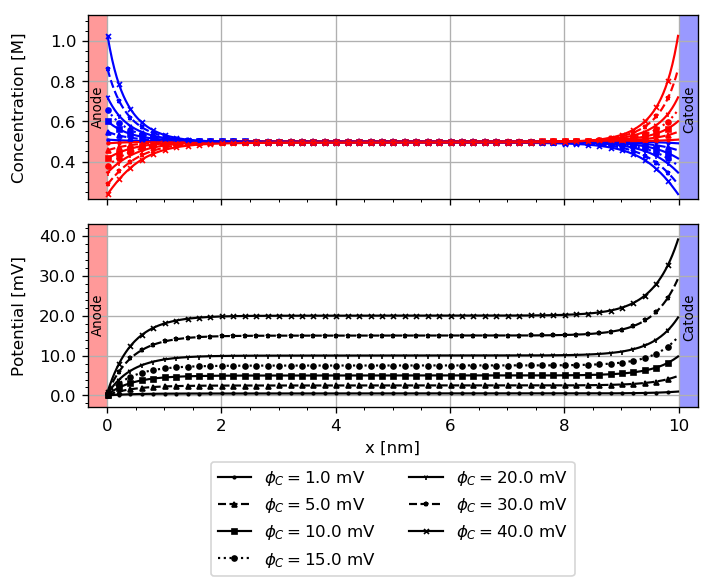

In [4]:
# Define plotting functions

def interactivePlotting( I, sol_arg, centers, L, plotindex = None, markers = None,
                        styles = None, labels = None, savename = None ):
    """
    Plotting time dependent solutions
    """
    label_flag = 0
    marker_flag = 0
    style_flag = 0
    
    # check input
    if isinstance( sol_arg, np.ndarray):
        # normal or interactive plot mode
        
        if plotindex is None and not sol_arg.shape.__len__() == 1:
            
            raise ValueError('Dimension mismatch, have to give plotindex')
        
        elif sol_arg.shape.__len__() == 1:
            
            sol_plot = [ sol_arg ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I].min() - sol_arg[0:2*I].min() * 0.05
            cmax = sol_arg[0:2*I].max() + sol_arg[0:2*I].max() * 0.05

            phimin = sol_arg[2*I:3*I].min() - sol_arg[2*I:3*I].min() * 0.05
            phimax = sol_arg[2*I:3*I].max() + sol_arg[2*I:3*I].max() * 0.05
        
        elif isinstance(plotindex, int) and sol_arg.shape.__len__() == 2:
            
            sol_plot = [ sol_arg[:,plotindex] ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I,:].min() - sol_arg[0:2*I,:].min() * 0.05
            cmax = sol_arg[0:2*I,:].max() + sol_arg[0:2*I,:].max() * 0.05

            phimin = sol_arg[2*I:3*I,:].min() - sol_arg[2*I:3*I,:].min() * 0.05
            phimax = sol_arg[2*I:3*I,:].max() + sol_arg[2*I:3*I,:].max() * 0.05
            
    elif isinstance( sol_arg, list):
        # plot single sol pictures

        sol_plot = sol_arg
        
        cmin_tmp = min([ el[0:2*I].min() for el in sol_plot ])
        cmax_tmp = max([ el[0:2*I].max() for el in sol_plot ])
        
        pmin_tmp = min([ el[2*I:3*I].min() for el in sol_plot ])
        pmax_tmp = max([ el[2*I:3*I].max() for el in sol_plot ])
        
        print(pmin_tmp)
        print(pmax_tmp)
        # extraxt ion/pot max and min on yaxis and xaxis
        cmin = cmin_tmp - np.abs(cmin_tmp) * 0.1
        cmax = cmax_tmp +  np.abs(cmax_tmp) * 0.1
        
        # deal with small minimum / maximum
        if np.abs(pmin_tmp) < 1 :
            
            phimin = -3 # mV
            
        else:
            
             phimin = pmin_tmp - np.abs(pmin_tmp) * 0.1
            
        if  np.abs(pmax_tmp) < 1 :
                       
            phimax = 3 # mV
            
        else:
            
            phimax = pmax_tmp + np.abs(pmax_tmp) * 0.1
        
    if not markers is None:
    
        if not isinstance(markers, list) or not markers.__len__() == sol_plot.__len__():
            
            raise ValueError('Markers have to be a list with same length as sol_arg!')
            
        else:
            
            marker_flag = 1
    
    if not styles is None:
        
        if not isinstance(styles, list) or not styles.__len__() == sol_plot.__len__():
            
            raise ValueError('Styles have to be a list with same length as sol_arg!')
            
        else:
            
            style_flag = 1
            
    if not labels is None:
        
        if not isinstance(labels, list) and not labels.__len__() == sol_plot.__len__():
            
            raise TypeError('Labels have to be a list with same length as sol_arg!')
        
        else:
            
            label_flag = 1
            
    xmin = - L/30.
    xmax = L + L/30.
    
    fig = plt.figure( dpi = 120 )
    
    # create axes
    ax = fig.add_subplot(2,1,1)
    ax1 = fig.add_subplot(2,1,2, sharex = ax)
    
    # iterate over sol_plot list
    for i in range(0, sol_plot.__len__() ):
        
        # cations
        c_line = ax.plot(centers * L, sol_plot[i][0:I], color = "blue", alpha = 1.0, lw = 1.3,)[0];
        
        # anions
        a_line = ax.plot(centers * L, sol_plot[i][I:2*I], color = "red",alpha = 1.0, lw = 1.3,)[0];
        
        # potential
        p_line = ax1.plot(centers * L, sol_plot[i][2*I:3*I],alpha = 1.0, color = "black", lw = 1.3,)[0];
        
        print(p_line)
        
        if marker_flag == 1:
            
            c_line.set_marker(markers[i])
            c_line.set_markersize(3)
            c_line.set_markevery(10)
            
            a_line.set_marker(markers[i])
            a_line.set_markersize(3)
            a_line.set_markevery(10)
            
            p_line.set_marker(markers[i])
            p_line.set_markersize(3)
            p_line.set_markevery(10)
            
        if style_flag == 1:
            
            c_line.set_linestyle(styles[i])
            a_line.set_linestyle(styles[i])
            p_line.set_linestyle(styles[i])
            
        if label_flag == 1:
            
           # c_line.set_label(labels[i])
            #a_line.set_label(labels[i])
            p_line.set_label(labels[i])
            
    # axis spec 
    
    # labels
    ax.set_ylabel(r"Concentration [M]")
    ax1.set_xlabel(r"x [nm]")
    #ax1.set_xlabel(r"x")
    ax1.set_ylabel(r"Potential [mV]")
    
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax1.yaxis.set_label_coords(-0.1, 0.5)
    
    # grids
    ax.grid(b=True, which = 'major', axis = 'both', linewidth = 0.8)
    ax1.grid(b=True, which = 'major', axis = 'both', linewidth = 0.8)
    
    # axis ticks
    plt.setp(ax.get_xticklabels(), visible = False)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
#     ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 8)
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    # fill anode catode
    ax.fill_between( [xmin,0],cmin, cmax, facecolor = "red", alpha = 0.4)
    ax1.fill_between( [xmin,0],phimin, phimax, facecolor = "red", alpha = 0.4)
    
    ax.fill_between( [L,xmax+1],cmin, cmax, facecolor = "blue", alpha = 0.4)
    ax1.fill_between( [L,xmax+1],phimin, phimax, facecolor = "blue", alpha = 0.4)
    
    # annotate anode catode
    ax.text(0.005, 0.56, 'Anode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.005, 0.56, 'Anode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    ax.text(0.975, 0.56, 'Catode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.975, 0.56, 'Catode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    # set ax limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([cmin, cmax])
    ax1.set_ylim([phimin, phimax])
    
    # legend
    handles, labels = ax.get_legend_handles_labels()
    handles1, labels1 = ax1.get_legend_handles_labels()
    
    if label_flag == 1:
        
        ax1.legend(handles + handles1, labels + labels1, loc = 9, bbox_to_anchor = (0.5,-0.25),
                   fancybox = True, ncol = 2 )
    
    fig.tight_layout()
    
    if isinstance(savename, str):
        
        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
    
    plt.show()
    
def i_plot( sol, plotindex, I, centers ):
    
    ymin = sol[0:2*I,:].min() - 0.05 * sol[0:2*I,:].min()
    ymax = sol[0:2*I,:].max() + 0.05 * sol[0:2*I,:].max()
    
    fig = plt.figure( dpi = 120 )
    ax = fig.add_subplot(1,1,1)
    ax1 = ax.twinx()
    
    ax.plot( centers, sol[0:I,plotindex], color = "blue")
    ax.plot( centers, sol[I:2*I,plotindex], color = "red")
    ax1.plot( centers, sol[2*I:3*I,plotindex], color = "black")
    
    ax.set_ylim([ymin, ymax])
    
    plt.show()
    
# plot solution

Dx, centers = stp.calcAxis()

# interact( i_plot,
#          sol = fixed(stp.sol_data),
#          plotindex = widgets.IntSlider(min = 0, max = stp.N-1, value = 0),
#          I = fixed(stp.I),
#          centers = fixed(centers),
#           );



L = stp.L
markers = ['.','^','s', 'o','1','*','x' ] + ['.','^','s', 'o','1','*','x' ]   #,'*']#,'D'  ]
styles = ['-', '--', '-',':','-', '--', '-',':'] + ['--', '--', '--','--','--', '--', '--','--']#,'-','--' ]
# labels = [5e-3, 10e-3, 15e-3, 20e-3, 30e-3 ]
labels = [ 'L = 10nm', 'L = 20nm', 'L = 30nm', 'L = 40nm' ]
# labels = ['$\phi_C = -30e-3$ mV',
#           '$\phi_C = -20e-3$ mV',
#           '$\phi_C = -15e-3$ mV',
#           '$\phi_C = -10e-3$ mV' ,
#           '$\phi_C = -5e-3$ mV',
#           '$\phi_C = 5e-3$ mV',
#           '$\phi_C = 10e-3$ mV',
#           '$\phi_C = 15e-3$ mV',
#           '$\phi_C = 20e-3$ mV',
#           '$\phi_C = 30e-3$ mV' ]

interactivePlotting( stp.I, sol_list[7:], centers, 10.0, plotindex = None, 
                  markers = markers[:7],
                   styles = styles[:7],
                   labels = label_list[7:],
#                    savename = "20180607_model_0_sweep1"
                   );

In [4]:
stp.sol_data

array([ 0.46143582,  0.4676556 ,  0.47290451, ..., -3.94290442,
       -4.23306385, -4.58152789])

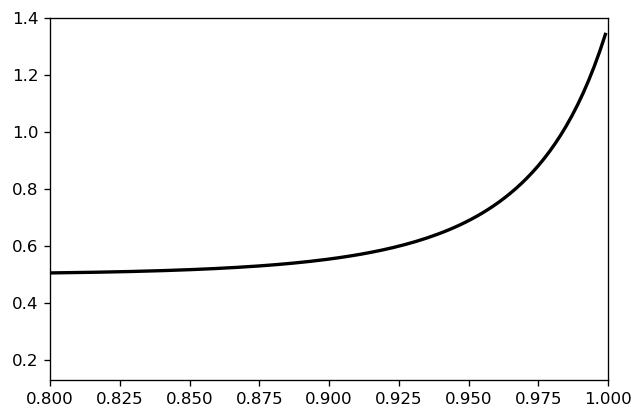

In [87]:
# reproduce BOltzmann distribution

def boltz( c0, chi1, phi, f):
    
    return c0 * np.exp( -chi1 * phi * f )


f = 2
c_ref = boltz(0.5, stp.chi1, sol_list[0][2*stp.I:3*stp.I] * stp.phi0 - sol_list[0][2*stp.I + int(stp.I/2) ] * stp.phi0, f)


fig = plt.figure( dpi = 120 )

ax = fig.add_subplot(1,1,1)

ax.plot(centers, c_ref, color = "black", lw = 2)
ax.set_xlim([0.8,1.0])
# ax.plot(-centers, sol_list[0][0:stp.I])
fig.savefig("ink.pdf", format = 'pdf')

In [13]:
sol_list[0]

array([  0.28631682,   0.29347881,   0.30048191, ..., -28.05846252,
       -28.67535173, -29.32201919])

In [ ]:
# test plot triangular surface plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

N = sol_list[0].shape[1]
# make a mesh x = centers, y = time
t = np.zeros(N, dtype = np.float64)
for j in range(0,N):

    t[j] = j * stp.Dt
            
u, v = np.meshgrid(centers, t)
        
u, v = u.flatten(), v.flatten()

fig = plt.figure(figsize=plt.figaspect(0.5))

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(u, v, sol_list[0], triangles=tri.triangles, cmap=plt.cm.Spectral)



was sehen wir:

+ Aufbau der Double Layer


(6631,)
6631
(6415,)
6415
(6126,)
6126
(5927,)
5927
(5653,)
5653
(5190,)
5190
(4122,)
4122


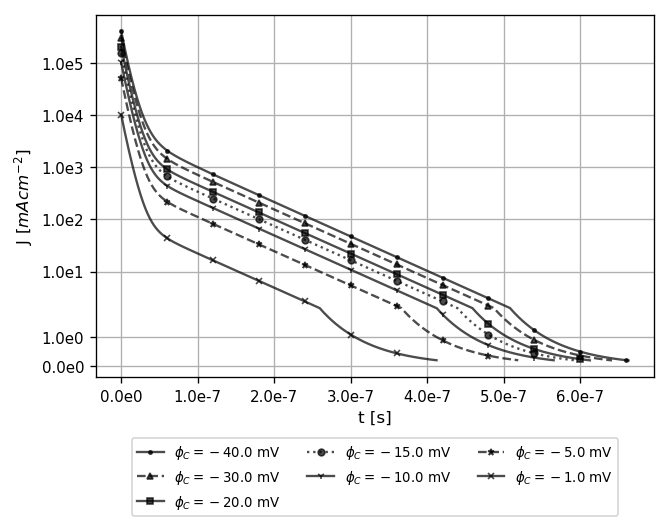

In [12]:
# plot current function
# plot current
def plotCurrent( Dt, T0, cur_arg, electrode = 'anode', markers = None, styles = None, labels = None,
               savename = None):
    
    # cur arg is list or cur arg is single numpy array
    label_flag = 0
    marker_flag = 0
    style_flag = 0
    
    # check input
    if isinstance( cur_arg, np.ndarray):

        # normal or interactive plot mode
        if electrode == 'anode':
            
            cur_plot = [ cur_arg[0,3:] ]
            
            plotcolor = 'red'
            
        elif electrode == 'catode':
            
            cur_plot = [ cur_arg[1,3:] ]
            
        elif electrode == 'both':
            
            cur_plot = [ cur_arg[:,3:] ]
            
            plotcolor = 'blue'
            
    elif isinstance( cur_arg, list):
        
        if electrode == 'anode':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[0,3:] )
            
        elif electrode == 'catode':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[1,3:] )
            
        elif electrode == 'both':
            
            cur_plot = []
            
            for array in cur_arg:
                
                cur_plot.append( array[:,3:] )
        
    if not markers is None:
    
        if not isinstance(markers, list) or not markers.__len__() == cur_plot.__len__():
            
            raise ValueError('Markers have to be a list with same length as sol_arg!')
            
        else:
            
            marker_flag = 1
    
    if not styles is None:
        
        if not isinstance(styles, list) or not styles.__len__() == cur_plot.__len__():
            
            raise ValueError('Styles have to be a list with same length as sol_arg!')
            
        else:
            
            style_flag = 1
            
    if not labels is None:
        
        if not isinstance(labels, list) and not labels.__len__() == cur_plot.__len__():
            
            raise TypeError('Labels have to be a list with same length as sol_arg!')
        
        else:
            
            label_flag = 1
            

    
    fig = plt.figure( dpi = 120 )
    
    # create axes
    ax = fig.add_subplot(1,1,1)
    
    # iterate over sol_plot list
    for i in range(0, cur_plot.__len__() ):
        
        array = cur_plot[i]
        
        print(array.shape)
        
        if electrode == 'both':
            
            N = array.shape[1]
            
            
            # create t axis
            t = np.zeros(N, dtype = np.float64)
            for j in range(0,N):
                t[j] = j*Dt        
            a_line = ax.plot(t*T0,(-1) * array[0,:], color = 'black',alpha = 0.7,  lw = 1.4, )[0]
            
            c_line = ax.plot(t*T0,(-1) *  array[1,:], color = 'green',alpha = 0.7,  lw = 1.4, )[0]
            
            
        else:
            
            N = array.shape[0]
            print(N)
            # create t axis
            
            t = np.zeros(N, dtype = np.float64)
            for j in range(0,N):
                t[j] = j*Dt
                
            a_line = ax.plot(t*T0, array, alpha = 0.7, color = "black", lw = 1.4, )[0]
            
        if marker_flag == 1:
            
            a_line.set_marker(markers[i])
            a_line.set_markersize(4)
            a_line.set_markevery(600)
            
            try:
                c_line.set_marker(markers[i])
                c_line.set_markersize(3)
                c_line.set_markevery(600)
            
            except:
                
                pass
            
        if style_flag == 1:
            
            a_line.set_linestyle(styles[i])
            
            try:
                c_line.set_linestyle(styles[i])
            except:
                pass
            
        if label_flag == 1:
            
            a_line.set_label(labels[i])
    
    # logscale
    ax.set_yscale('symlog', linthresh = 1e-12)
    
    # labels
    ax.set_ylabel(r"J [$ mA cm^{-2}$]")
    ax.set_xlabel(r"t [s]")
    
    # grids
    ax.grid(b=True, which = 'major', axis = 'both')
        
    # axis ticks
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1e"))
    
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
       
#     ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
#     ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
   # ax.set_xlim([0,4.2e-6])
    if label_flag == 1:
        
        handles, labels = ax.get_legend_handles_labels()
        
        ax.legend(handles, labels, loc = 9, bbox_to_anchor = (0.5,-0.15), fancybox = True, ncol = 3, fontsize = 8 )
                   # bbox_to_anchor = (0.55,-0.15), fancybox = True,  )
    
    
    
    plt.draw()
    
    # get ticklabels
    ty = ax.get_yticklabels()
    tx = ax.get_xticklabels()
    
    # modify ticklabel: remove annoying +0 in exponent
    for el in ty:
        ylab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
        el.set_text(ylab)
        
    for el in tx:
        
        if not el.get_text() == '':
            xlab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
            el.set_text(xlab)
    
    # set ticklabels
    ax.set_yticklabels(ty, fontsize = 9)
    ax.set_xticklabels(tx, fontsize = 9)
    
    plt.draw()
    
    
    if isinstance(savename, str):

        for fmt in ['png', 'pdf']:
           
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
     
#-----------------end function--------------------------------------------------------------
    
markers = ['.','^','s', 'o','1','*','x' ] + ['.','^','s', 'o','1','*','x' ]   #,'*']#,'D'  ]
styles = ['-', '--', '-',':','-', '--', '-',':'] + ['--', '--', '--','--','--', '--', '--','--']#,'-','--' ]


plotCurrent( stp.Dt, stp.T0, cur_list[:7] , electrode = 'catode',
           markers = markers[:7],
            styles = styles[:7],
           labels = label_list[:7],
        savename = "20180608_model_0_sweep_current_0"
           )

In [60]:
cur_list.__len__()

13

In [ ]:
# load old solutions

# cur_ss_arr1 = np.load('cur_ss_1.npy')
# cur_ss_arr2 = np.load('cur_ss_2.npy')
# total_concentration1 = np.load('tot_c_1.npy')
# total_concentration2 = np.load('tot_c_2.npy')

# save vergleichsarrays
np.save('cur_ss_model2_3.npy', cur_ss_arr)
np.save('tot_c_model2_3.npy', tot_c_ss)

In [ ]:


# plot steady state currents       
fig = plt.figure( dpi = 120 )
    
# create axes
ax = fig.add_subplot(1,1,1)

ax.plot(volt_arr, cur_ss_arr[:,0], ls = 'None', marker = '+', markersize = 9,
        color = 'red', label = 'Anode Kinetic Factor $10^{-2}$')

ax.plot(volt_arr, cur_ss_arr[:,1], ls = 'None', marker = '.', markersize = 9,
        color = 'blue', label = 'Catode Kinetic Factor $10^{-2}$', alpha = 0.6)

# ax.plot(volt_arr, cur_ss_arr1[:,0], ls = 'None', marker = '*', markersize = 9,
#         color = 'red', label = 'Anode Kinetic Factor $10^{-3}$')

# ax.plot(volt_arr, cur_ss_arr1[:,1], ls = 'None', marker = 's', markersize = 5,
#         color = 'blue', label = 'Catode Kinetic Factor $10^{-3}$', alpha = 0.6)

# ax.plot(volt_arr, cur_ss_arr2[:,0], ls = 'None', marker = 'p', markersize = 5,
#         color = 'red', label = 'Anode Kinetic Factor $10^{-2}$')

# ax.plot(volt_arr, cur_ss_arr2[:,1], ls = 'None', marker = 'x', markersize = 9,
#         color = 'blue', label = 'Catode Kinetic Factor $10^{-2}$', alpha = 0.6)

# labels
ax.set_ylabel(r"Steady State J [$mA cm^{-2}$]")
ax.set_xlabel(r"$\phi_C$ [mV]")

# grids
ax.grid(b=True, which = 'major', axis = 'both', lw = 0.8)

# axis ticks
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))

#ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 8 )

ax.set_yscale('symlog', linthresh = 1e-18)

plt.draw()

# get ticklabels
ty = ax.get_yticklabels()
tx = ax.get_xticklabels()

# modify ticklabel: remove annoying +0 in exponent
# for el in ty:
    
#     print(el.get_text())#.split(sep = 'e'))
#     ylab = el.get_text().split(sep = 'e')[0] + 'e' + el.get_text().split(sep = 'e')[1].replace('+0','').replace('-0','-')
#     el.set_text(ylab)

# set ticklabels
ax.set_yticklabels(ty, fontsize = 9)
ax.set_xticklabels(tx, fontsize = 9)


plt.show()


# for fmt in ['png', 'pdf']:
#     fig.savefig('20180607_model2_test_UI_compl_log' + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )

In [ ]:
tot_c_ss = np.zeros(total_concentration.__len__(), dtype = np.float64 )
for i in range(total_concentration.__len__()):
    tot_c_ss[i] = total_concentration[i][-1]

In [ ]:
# plot total concentration against voltage

fig = plt.figure( dpi = 120 )

ax = fig.add_subplot(1,1,1)

ax.plot(volt_arr, tot_c_ss, ls = 'None', marker = '.', markersize = 9,label = 'Anode Kinetic Factor $10^{-1}$')
# ax.plot(volt_arr, total_concentration1, ls = 'None', marker = '*', markersize = 7, label = 'Anode Kinetic Factor $10^{-3}$')
# ax.plot(volt_arr, total_concentration2, ls = 'None', marker = 's', markersize = 5, label = 'Anode Kinetic Factor $10^{-2}$' )

# labels
ax.set_ylabel(r"Total Cation Concentration [M]")
ax.set_xlabel(r"$\phi_C$ [mV]")

# grids
ax.grid(b=True, which = 'major', axis = 'both', lw = 0.8)

# axis ticks
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.3f"))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))

#ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)

ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 8 )

plt.show()

for fmt in ['png', 'pdf']:
    fig.savefig('20180605_model2_total_C_conc_total' + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
